In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("customer_churn.csv")
df.head()

,CustomerID,Age,Gender,Tenure_Months,Contract_Type,Payment_Method,Monthly_Charges,Total_Charges,Num_Support_Calls,Avg_Login_Per_Month,Churn
0,CUST_1000,56,Female,15,One year,Electronic check,83.72,1255.80,1,19,1
1,CUST_1001,57,Female,3,Month-to-month,Mailed check,94.98,284.94,5,6,1
2,CUST_1002,38,Male,58,One year,Credit card,32.08,1860.64,2,27,0
3,CUST_1003,32,Female,62,One year,Bank transfer,64.42,3994.04,3,25,1
4,CUST_1004,68,Male,21,Month-to-month,Mailed check,115.40,2423.40,3,14,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           10000 non-null  object 
 1   Age                  10000 non-null  int64  
 2   Gender               10000 non-null  object 
 3   Tenure_Months        10000 non-null  int64  
 4   Contract_Type        10000 non-null  object 
 5   Payment_Method       10000 non-null  object 
 6   Monthly_Charges      10000 non-null  float64
 7   Total_Charges        10000 non-null  float64
 8   Num_Support_Calls    10000 non-null  int64  
 9   Avg_Login_Per_Month  10000 non-null  int64  
 10  Churn                10000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 859.5+ KB


In [7]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.5904
1    0.4096
Name: proportion, dtype: float64

C:\Users\rdine\AppData\Local\Temp\ipykernel_18396\1719151749.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


Text(0, 0.5, 'Count')

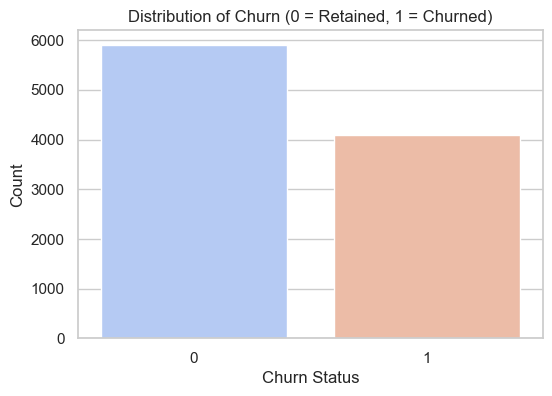

In [8]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Distribution of Churn (0 = Retained, 1 = Churned)')
plt.xlabel('Churn Status')
plt.ylabel('Count')

Text(0.5, 1.0, 'Churn by Gender')

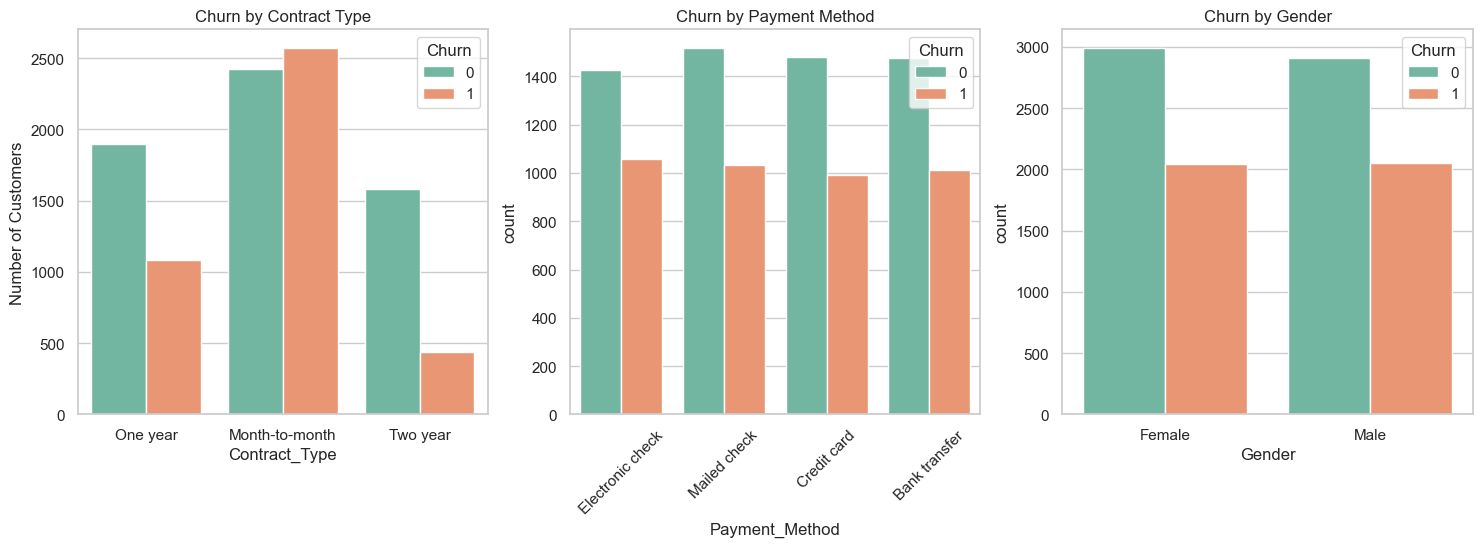

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='Contract_Type', hue='Churn', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Churn by Contract Type')
axes[0].set_ylabel('Number of Customers')

sns.countplot(x='Payment_Method', hue='Churn', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Churn by Payment Method')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(x='Gender', hue='Churn', data=df, ax=axes[2], palette='Set2')
axes[2].set_title('Churn by Gender')

C:\Users\rdine\AppData\Local\Temp\ipykernel_18396\3092716355.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Tenure_Months', data=df, ax=axes[0], palette='coolwarm')
C:\Users\rdine\AppData\Local\Temp\ipykernel_18396\3092716355.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Monthly_Charges', data=df, ax=axes[1], palette='coolwarm')
C:\Users\rdine\AppData\Local\Temp\ipykernel_18396\3092716355.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='Num_Support_Calls', data=df, ax=axes[2], palette='

Text(0.5, 1.0, 'Support Calls: Churn vs Retained')

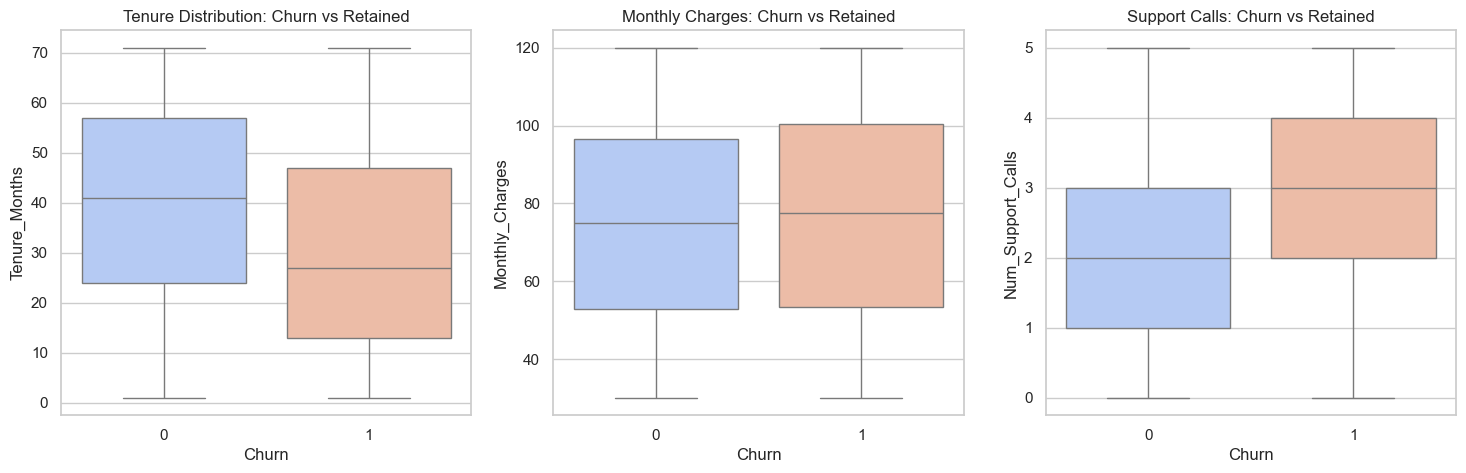

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x='Churn', y='Tenure_Months', data=df, ax=axes[0], palette='coolwarm')
axes[0].set_title('Tenure Distribution: Churn vs Retained')

sns.boxplot(x='Churn', y='Monthly_Charges', data=df, ax=axes[1], palette='coolwarm')
axes[1].set_title('Monthly Charges: Churn vs Retained')

sns.boxplot(x='Churn', y='Num_Support_Calls', data=df, ax=axes[2], palette='coolwarm')
axes[2].set_title('Support Calls: Churn vs Retained')

Text(0.5, 1.0, 'Correlation Matrix (Red = High Correlation with Churn)')

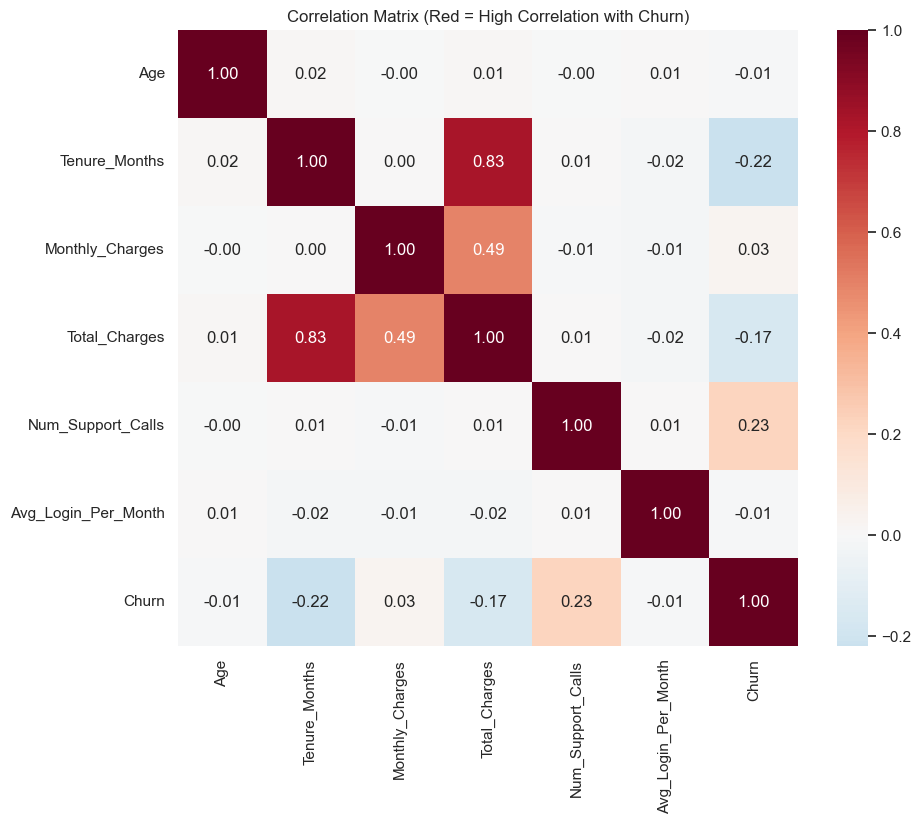

In [12]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 8))

sns.heatmap(numerical_df.corr(), annot=True, cmap='RdBu_r', fmt=".2f", center=0)
plt.title('Correlation Matrix (Red = High Correlation with Churn)')